# Propriedades da Transformada Discreta de Fourier

Neste texto vamos observar por meios de demostrações computacionais as propriedades da Transformada Discreta de Fourier, para tanto, devemos lembrar que definimos s DFT como
$$
X[k] = \sum_{n=0}^{N-1}x(n)e^{-\frac{j2\pi nk}{N}}
$$
e vamos inicialmente implementar uma função $sinc(n)$ com $n = 512$ pontos, pois ela será nosso sinal referência.

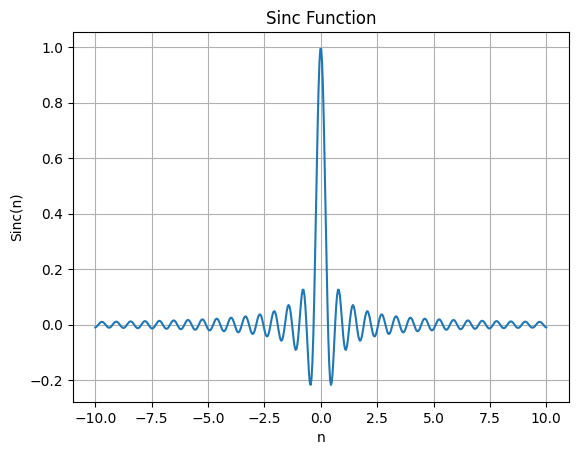

In [16]:
## Implementa a função sinc para ser utilizada nas demais demonstrações
#  Edmar Candeia Gurjão
#  Versão 20/09/2023

import numpy as np
import matplotlib.pyplot as plt
n = np.linspace(-10, 10, 512)
x = np.sinc(n*np.pi)

# O desenho da função deveria ser feito considerando o tempo 
# discreto, ou seja, usando plt.stem(n, x). Porém para ajudar
# visualização vamos usar plt.plot(n,x). 
#
# Aconselhamos a substituir plt.plot(n,x) por plt.stem(n,x) 
# na linha abaixo para verificar o efeito na figura.
plt.plot(n, x)
plt.title("Sinc Function")
plt.ylabel("Sinc(n)")
plt.xlabel("n")
plt.grid()
plt.show()

A DFT de uma função $sinc$ é um uma função retangular, como mostrado no código abaixo

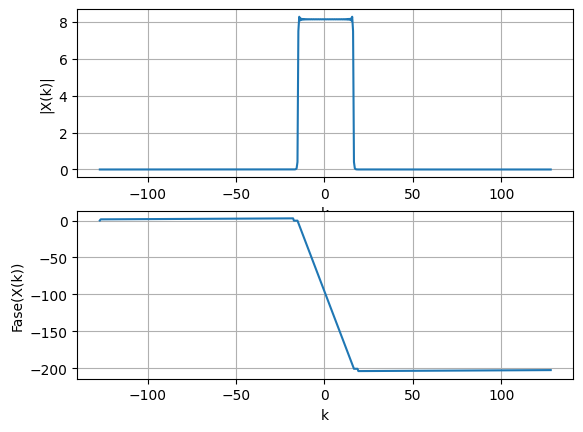

In [17]:
# Aplicando a DFT no sinal x = sinc gerado no código anterior.
#  Edmar Candeia Gurjão
#  Versão 20/09/2023

X_k = np.fft.fft(x)


#
plt.subplot(2,1,1)
#plt.plot(np.abs(X_k))

# Utilizando a função ffshist 
n1 = np.linspace(-127,128,512)
plt.plot(n1,np.abs(np.fft.fftshift(X_k)))

        
plt.ylabel("|X(k)|")
plt.xlabel("k")
plt.grid()
plt.subplot(2,1,2)

# Desenha a fase
#plt.plot(np.angle(X_k))
# Desenha a fase, e usa a função unwrap para "desdobrar" a fase, mostrando uma reta.
plt.plot(n1,np.unwrap(np.angle(np.fft.fftshift(X_k))))
plt.ylabel("Fase(X(k))")
plt.xlabel("k")
plt.grid()
plt.show()

## Observando a recuperação do sinal após o zero-padding

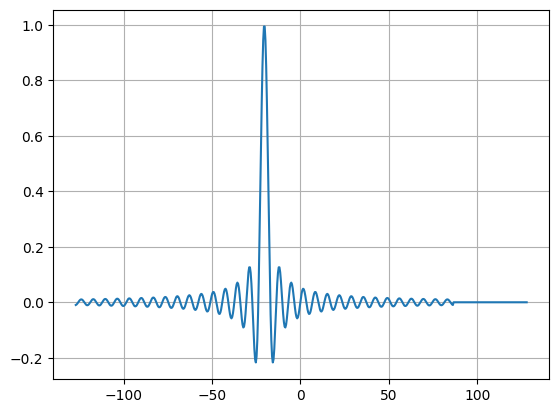

In [20]:
#np.pad(x,pad_width=4,'end')
#  Edmar Candeia Gurjão
#  Versão 20/09/2023

N = 100
xpadded =np.pad(x, (0, N), 'constant')

n2 = np.linspace(-127,128,612)
plt.plot(n2, xpadded)
plt.grid()

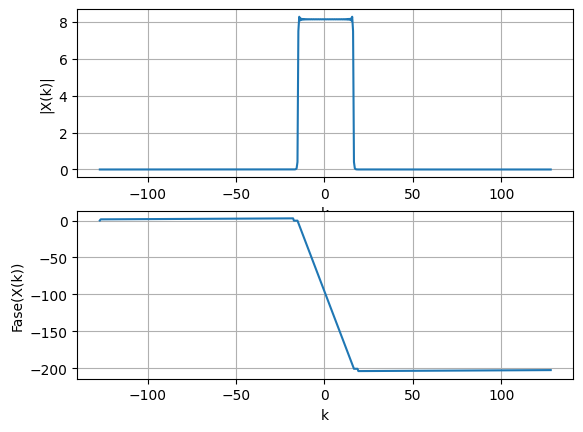

In [22]:
# Aplicando a DFT no sinal x = sinc gerado no código anterior.
#  Edmar Candeia Gurjão
#  Versão 20/09/2023

XPADDED_k = np.fft.fft(xpadded)



plt.subplot(2,1,1)
#plt.plot(np.abs(XPADDED_k))

# Utilizando a função ffshist 
n1 = np.linspace(-127,128,512)
plt.plot(n1, np.abs(np.fft.fftshift(X_k)))

        
plt.ylabel("|X(k)|")
plt.xlabel("k")
plt.grid()
plt.subplot(2,1,2)

# Dsenha a fase
#plt.plot(np.angle(XPADDED_k))
# Desenha a fase, e usa a função unwrap para "desdobrar" a fase, mostrando uma reta.plt.plot(n1,np.unwrap(np.angle(np.fft.fftshift(X_k))))
plt.plot(n1,np.unwrap(np.angle(np.fft.fftshift(X_k))))
plt.ylabel("Fase(X(k))")
plt.xlabel("k")
plt.grid()
plt.show()

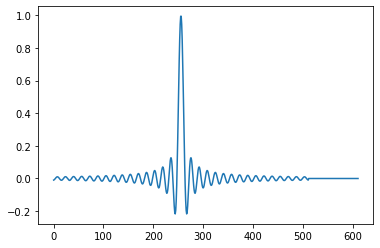

In [85]:
xpadded_r = np.fft.ifft(XPADDED_k)

plt.plot(xpadded_r)

## Deslocamento no tempo

A propriedade do deslocamento no tempo indica que ao deslocar um sinal no tempo por um valor $\tau$, o seu espectro de frequências é multiplicado por $e^{-j\omega \tau}$. No código essa propriedade está representada. 

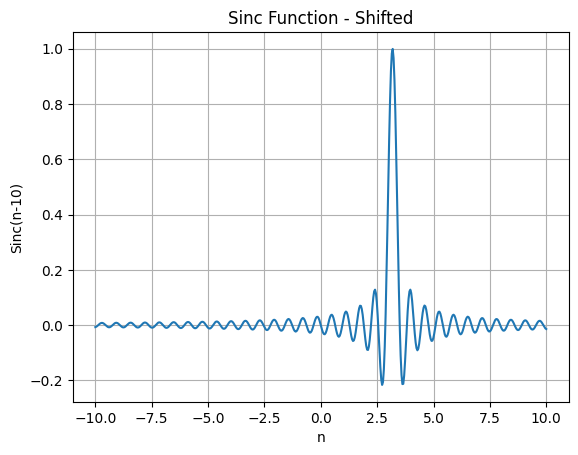

In [23]:
## Desloca o sinal x(n) de tau posições
#  Edmar Candeia Gurjão
#  Versão 20/09/2023

import numpy as np
import matplotlib.pyplot as plt

# Deslocamento
tau = 10
n = np.linspace(-10, 10, 512)

x1 = np.sinc(n*np.pi - tau)
  
plt.plot(n, x1)
plt.title("Sinc Function - Shifted")
plt.ylabel("Sinc(n-10)")
plt.xlabel("n")
plt.grid()
plt.show()

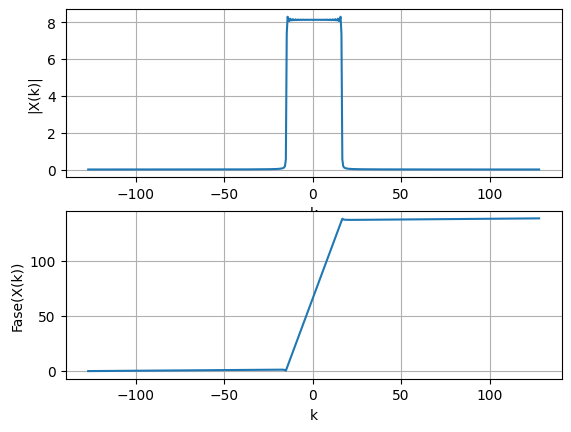

In [26]:
# Aplicando a DFT no sinal x = sinc gerado no código anterior.
#  Edmar Candeia Gurjão
#  Versão 20/09/2023

X_k = np.fft.fft(x1)


plt.subplot(2,1,1)
#plt.plot(np.abs(X_k))

# Utilizando a função ffshist 
n1 = np.linspace(-127,128,512)
plt.plot(n1, np.abs(np.fft.fftshift(X_k)))
plt.grid()

        
plt.ylabel("|X(k)|")
plt.xlabel("k")
plt.subplot(2,1,2)

# Desenha a fase
#plt.plot(np.angle(X_k))
# Desenha a fase, e usa a função unwrap para "desdobrar" a fase, mostrando uma reta.
plt.plot(n1,np.unwrap(np.angle(np.fft.fftshift(X_k))))
plt.ylabel("Fase(X(k))")
plt.xlabel("k")
plt.grid()
plt.show()

## Multiplicação por exponencial na frequência

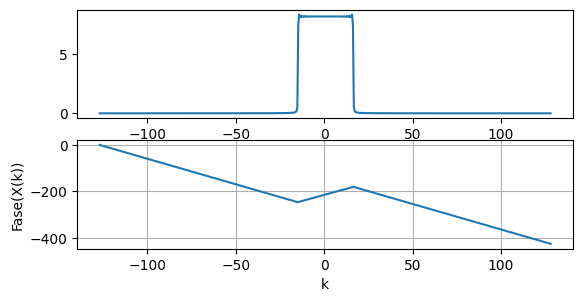

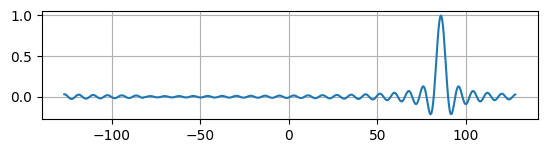

In [31]:
# Multiplica a DFT por e^{-j*2*pi*k*tau) sendo tau o atraso
#  Edmar Candeia Gurjão
#  Versão 20/09/2023

tau = 90

k = np.linspace(0,511,512)

ejwtau = np.exp(-1j*2*np.pi*k*tau/512)

X7 = X_k*ejwtau

# Desenha a DFT após a multiplicação
plt.subplot(3,1,1)
plt.plot(n1, np.abs(np.fft.fftshift(X7)))

# Desenha a fase
# plt.plot(np.angle(X_k))
# Desenha a fase, e usa a função unwrap para "desdobrar" a fase, mostrando uma reta.
plt.subplot(3,1,2)
plt.plot(n1,np.unwrap(np.angle(np.fft.fftshift(X7))))
plt.ylabel("Fase(X(k))")
plt.xlabel("k")
plt.grid()
plt.show()

x7_n = np.fft.ifft(X7)

n = np.linspace(-127,128,512)
plt.subplot(3,1,3)
plt.plot(n,x7_n)
plt.grid()

## Inversão no tempo

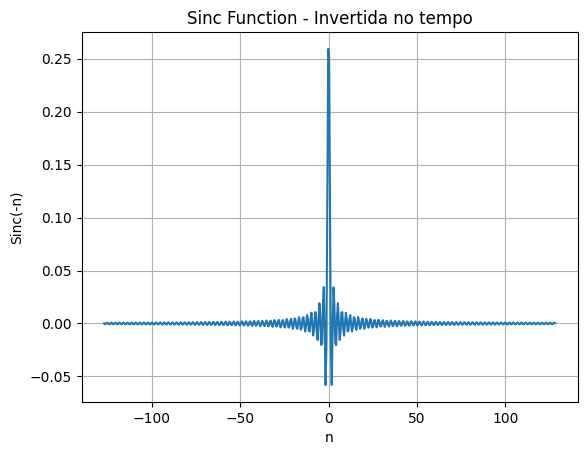

In [32]:
# Gera um sinal sinc
#  Edmar Candeia Gurjão
#  Versão 20/09/2023

# Gerando um sinal 
x2 = np.sinc(-n*np.pi)

plt.plot(n, x2)
plt.title("Sinc Function - Invertida no tempo")
plt.ylabel("Sinc(-n)")
plt.xlabel("n")
plt.grid()
plt.show()

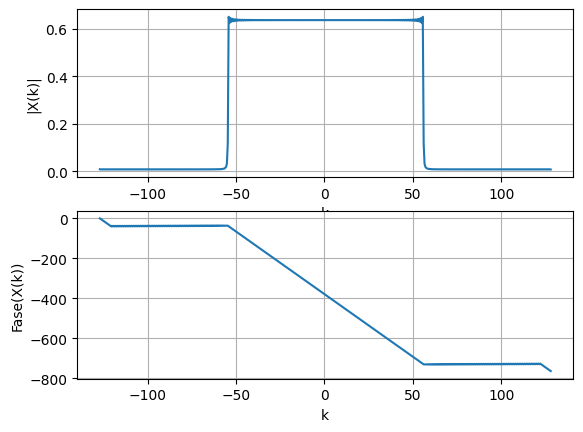

In [36]:
# Aplicando a DFT no sinal x = sinc gerado no código anterior.
#  Edmar Candeia Gurjão
#  Versão 20/09/2023


X_k = np.fft.fft(x2)

plt.subplot(2,1,1)
plt.plot(n1, np.abs(np.fft.fftshift(X_k)))
plt.grid()

        
plt.ylabel("|X(k)|")
plt.xlabel("k")
plt.subplot(2,1,2)

# Desenha a fase, e usa a função unwrap para "desdobrar" a fase, mostrando uma reta.
plt.plot(n1,np.unwrap(np.angle(np.fft.fftshift(X_k))))
plt.ylabel("Fase(X(k))")
plt.xlabel("k")
plt.grid()
plt.show()

## Convolução

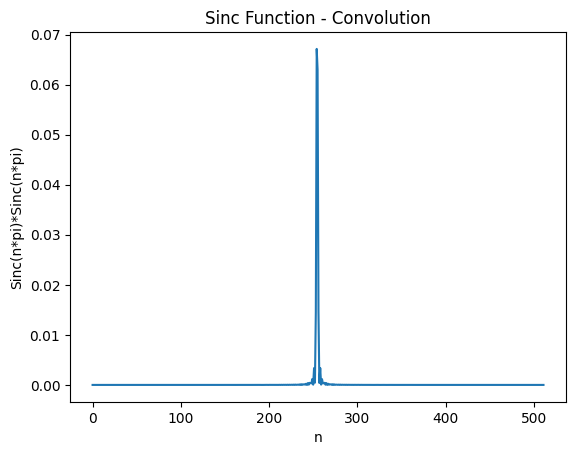

In [38]:
# Convolução no tempo
x6 = np.sinc(n*np.pi)*np.sinc(n*np.pi)
plt.plot(x6)
plt.title("Sinc Function - Convolution")
plt.ylabel("Sinc(n*pi)*Sinc(n*pi)")
plt.xlabel("n")
plt.show()

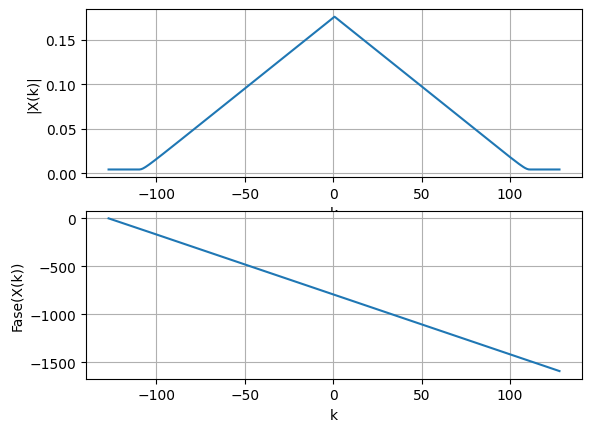

In [42]:
# Aplicando a DFT no sinal x = sinc gerado no código anterior.

X_k = np.fft.fft(x6)



plt.subplot(2,1,1)

# Utilizando a função ffshist 
n1 = np.linspace(-127,128,512)
plt.grid()
plt.plot(n1, np.abs(np.fft.fftshift(X_k)))

        
plt.ylabel("|X(k)|")
plt.xlabel("k")
plt.subplot(2,1,2)


# Desenha a fase, e usa a função unwrap para "desdobrar" a fase, mostrando uma reta.
plt.plot(n1,np.unwrap(np.angle(np.fft.fftshift(X_k))))
plt.ylabel("Fase(X(k))")
plt.xlabel("k")
plt.grid()
plt.show()

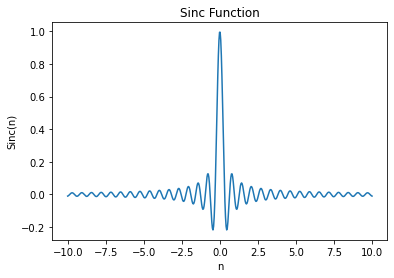

In [16]:
## Implementa a função sinc para ser utilizada nas demais demonstrações
import numpy as np
import matplotlib.pyplot as plt
n = np.linspace(-10, 10, 512)
x = np.sinc(n*np.pi)
plt.plot(n, x)
plt.title("Sinc Function")
plt.ylabel("Sinc(n)")
plt.xlabel("n")
plt.show()

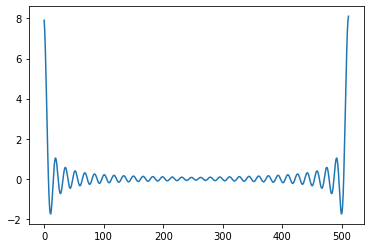

In [20]:
X_k = np.fft.fft(x)

X2_k = X_k*X_k;

x2_n = np.fft.ifft(X2_k)
plt.plot(x2_n)


## Modulação

Definimos modulação como o processo de deslocamento do espectro de freuências de um sinal. A foma mais 

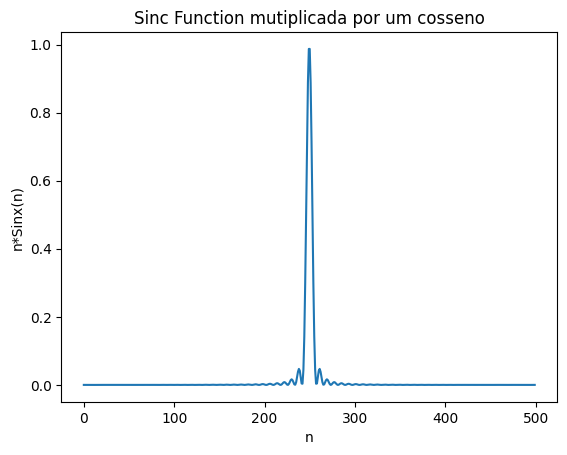

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(-10, 10, 500)
x = np.sinc(n*np.pi)
x3 = x*np.sinc(n*np.pi)
plt.plot(x3)
plt.title("Sinc Function mutiplicada por um cosseno")
plt.ylabel("n*Sinx(n)")
plt.xlabel("n")
plt.show()

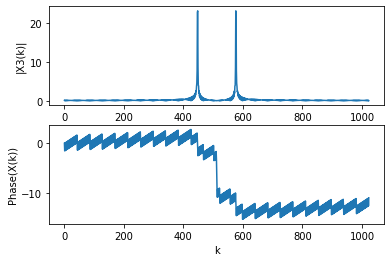

In [85]:
X3_k = np.fft.fft(x3,1024)
plt.subplot(2,1,1)
plt.plot(np.abs(np.fft.fftshift(X3_k)))
plt.ylabel("|X3(k)|")
plt.xlabel("k")
plt.subplot(2,1,2)
plt.plot(np.unwrap(np.angle(np.fft.fftshift(X3_k))))
plt.ylabel("Phase(X(k))")
plt.xlabel("k")
plt.show()

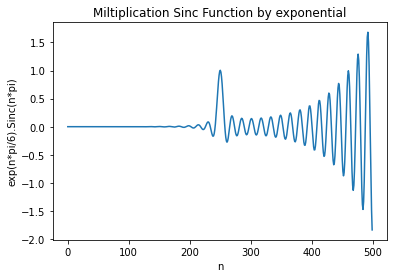

In [14]:
x4 = np.exp(n*np.pi/6)*np.sinc(n*np.pi)
plt.plot(x4)
plt.title("Miltiplication Sinc Function by exponential")
plt.ylabel("exp(n*pi/6).Sinc(n*pi)")
plt.xlabel("n")
plt.show()

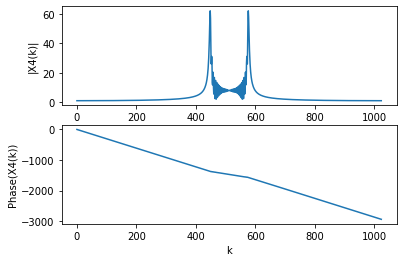

In [15]:
X4_k = np.fft.fft(x4,1024)
plt.subplot(2,1,1)
plt.plot(np.abs(np.fft.fftshift(X4_k)))
plt.ylabel("|X4(k)|")
plt.xlabel("k")
plt.subplot(2,1,2)
plt.plot(np.unwrap(np.angle(np.fft.fftshift(X4_k))))
plt.ylabel("Phase(X4(k))")
plt.xlabel("k")
plt.show()

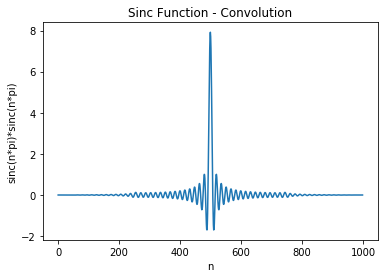

In [57]:
x5 = np.convolve(np.sinc(n*np.pi),np.sinc(n*np.pi))
plt.plot(x5)
plt.title("Sinc Function - Convolution")
plt.ylabel("sinc(n*pi)*sinc(n*pi)")
plt.xlabel("n")
plt.show()

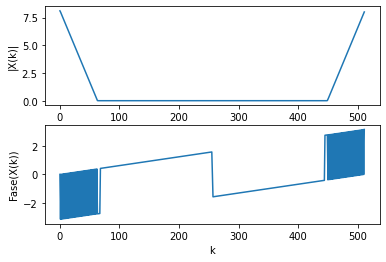

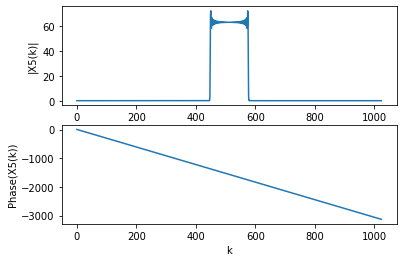

In [88]:
X5_k = np.fft.fft(x5,1024)
plt.subplot(2,1,1)
plt.plot(np.abs(np.fft.fftshift(X5_k)))
plt.ylabel("|X5(k)|")
plt.xlabel("k")
plt.subplot(2,1,2)
plt.plot(np.unwrap(np.angle(np.fft.fftshift(X5_k))))
plt.ylabel("Phase(X5(k))")
plt.xlabel("k")
plt.show()

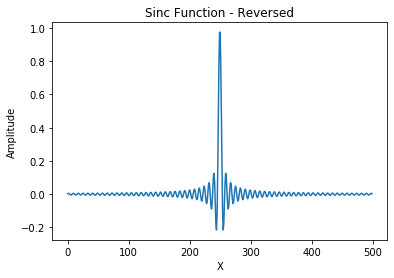

In [28]:
x7 = np.sinc(2*n*np.pi)
plt.plot(x7)
plt.title("Sinc Function - Time compressed")
plt.ylabel("Sinc(2*n*pi)")
plt.xlabel("n")
plt.show()